<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Required Libraries</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings("ignore")

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load Dataset</h1>
</div>

In [2]:
data=pd.read_csv("exam_score_prediction.csv")

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Explore Data</h1>
</div>

In [3]:
data.shape

(20000, 13)

In [4]:
data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [5]:
data.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [6]:
data.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Descriptive Statistic</h1>
</div>

In [9]:
data.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Visualization</h1>
</div>

<Axes: ylabel='Frequency'>

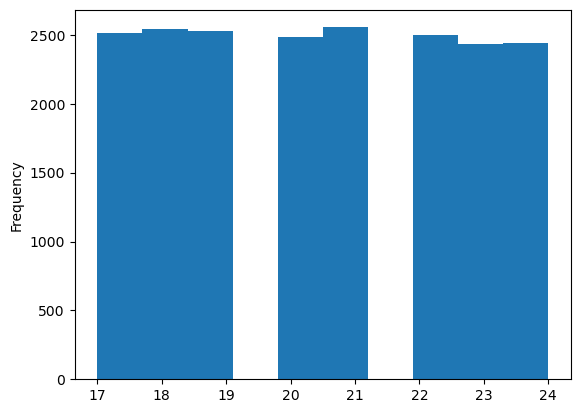

In [10]:
data["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

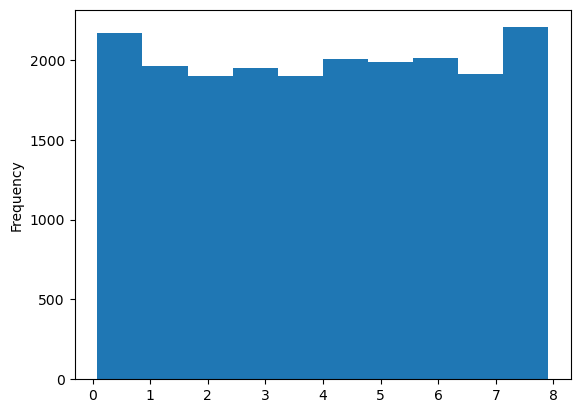

In [11]:
data["study_hours"].plot(kind="hist")

<Axes: ylabel='Frequency'>

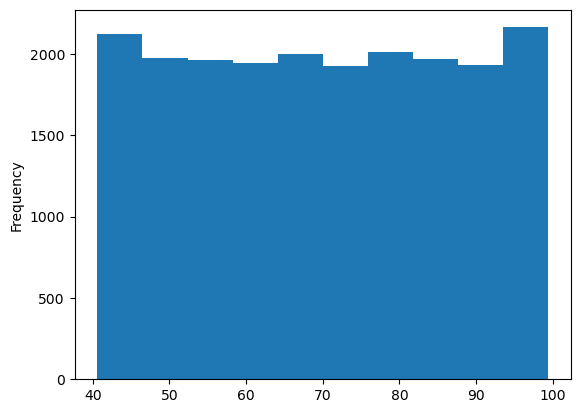

In [12]:
data["class_attendance"].plot(kind="hist")

<Axes: ylabel='Frequency'>

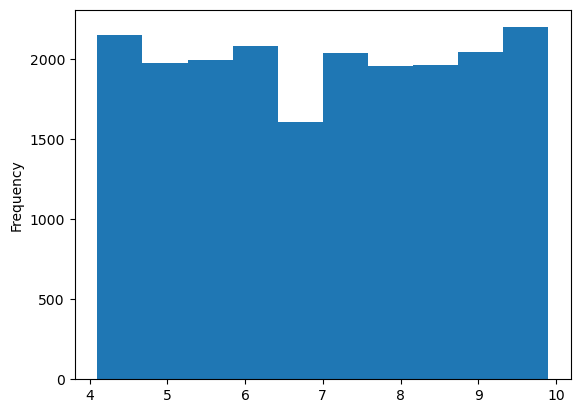

In [13]:
data["sleep_hours"].plot(kind="hist")

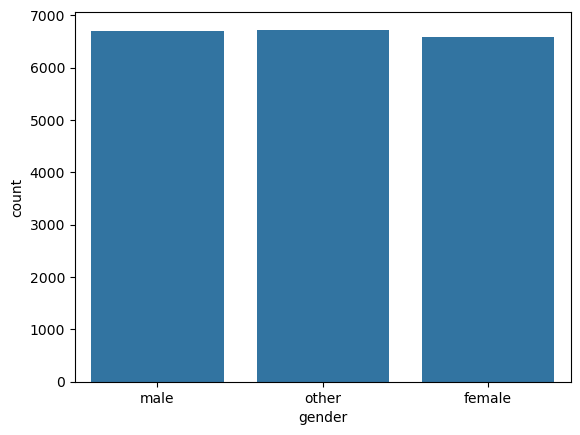

In [14]:
sns.countplot(x=data["gender"])
plt.show()

<Axes: xlabel='course', ylabel='count'>

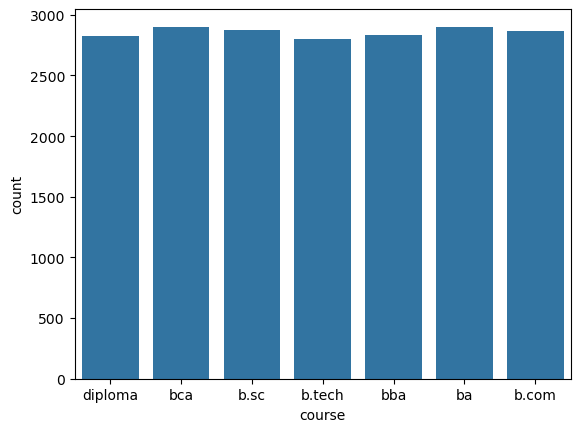

In [15]:
sns.countplot(x=data["course"])

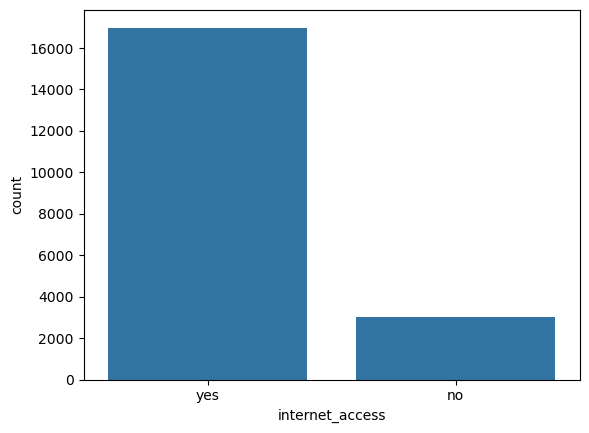

In [16]:
sns.countplot(x=data["internet_access"])
plt.show()

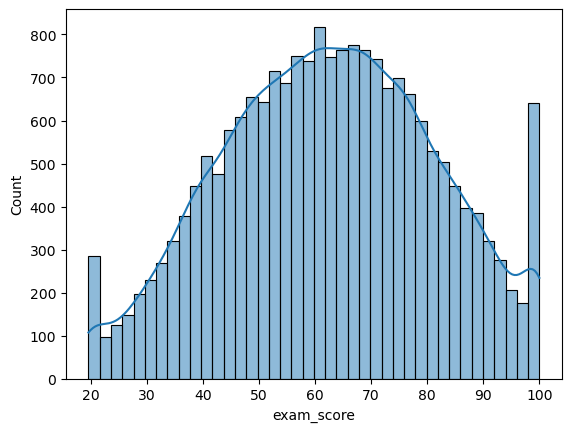

In [17]:
sns.histplot(x=data['exam_score'],kde=True)
plt.show()

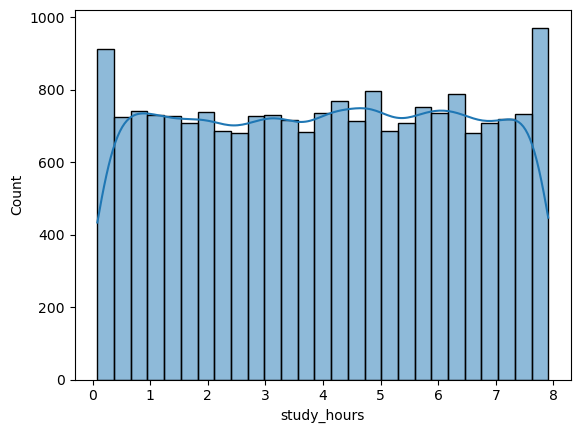

In [18]:
sns.histplot(x=data["study_hours"],kde=True)
plt.show()

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Outlier Detection</h1>
</div>

In [19]:
columns=['age',
         'study_hours',
         'class_attendance', 
         'sleep_hours', 
         'exam_score']

# Check Outliers

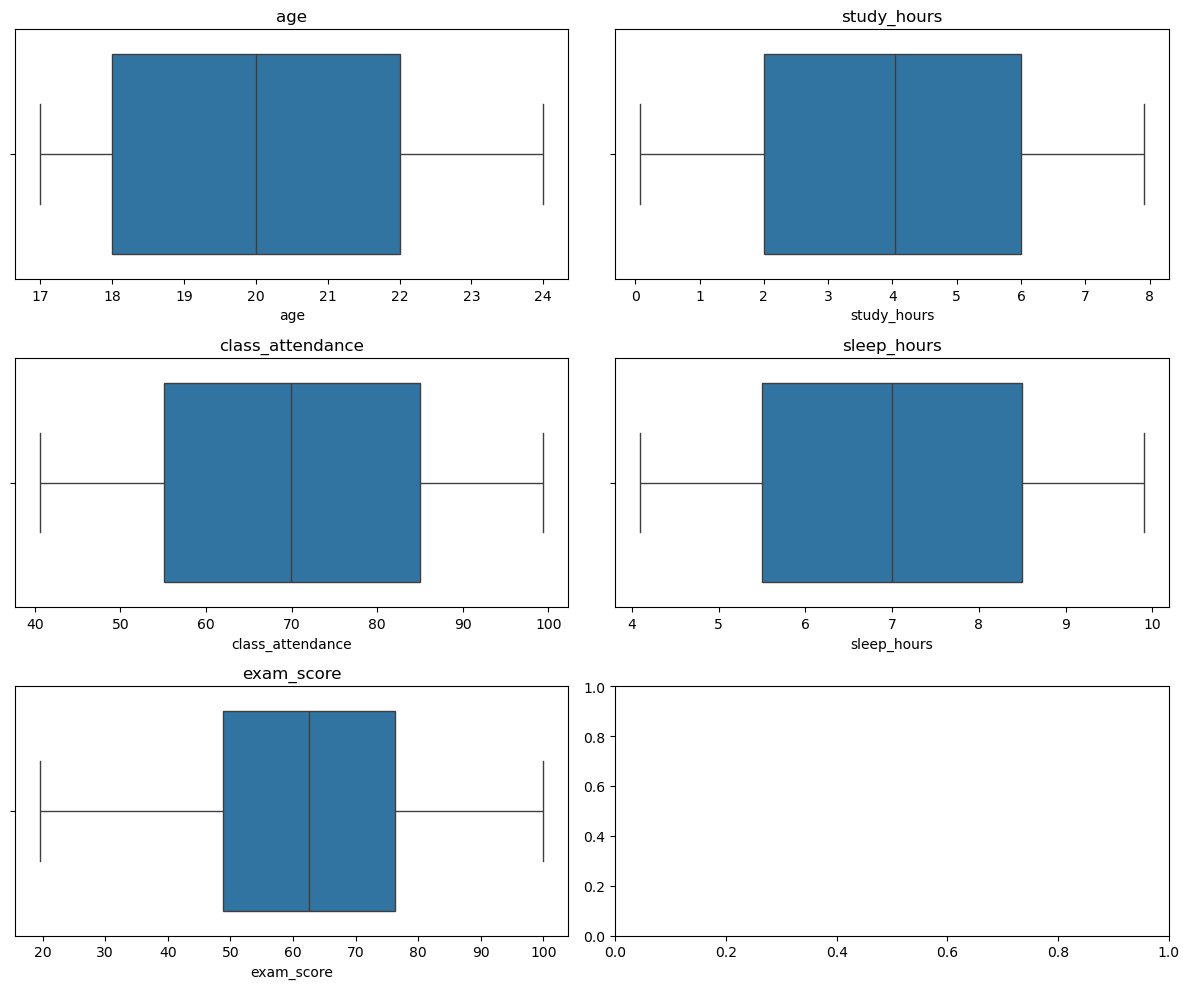

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=col, data=data, ax=ax)
    ax.set_title(f"{col}")
plt.tight_layout()
plt.show()

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Encoding</h1>
</div>

In [21]:
le=LabelEncoder()

for col in data.select_dtypes(include="object").columns:
    data[col]=le.fit_transform(data[[col]])

data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9
1,2,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8
2,3,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3
3,4,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7
4,5,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Feature Selection</h1>
</div>

In [22]:
x=data.drop(columns=["student_id","exam_score"],axis=1)
y=data["exam_score"]

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Cross Validation | Fit Model</h1>
</div>

# Random Forest

In [23]:
rf = RandomForestRegressor(n_estimators=100,
                           random_state=42)

kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

# Calculate RMSE using Cross-Validation (scikit-learn reports negative values for loss metrics)
cv_scores = cross_val_score(rf, 
                            x, 
                            y,
                            cv=kf, 
                            scoring='neg_root_mean_squared_error')

avg_rmse = -np.mean(cv_scores)
print(f"✅ Cross-Validation RMSE: {avg_rmse:.5f}")

✅ Cross-Validation RMSE: 10.39685


# XGBoost

In [24]:
xgb = XGBRegressor(n_estimators=100,
                   random_state=42)

kf = KFold(n_splits=5,
           shuffle=True,
           random_state=42)

# Calculate RMSE using Cross-Validation
cv_scores = cross_val_score(rf, 
                            x, 
                            y, 
                            cv=kf, 
                            scoring='neg_root_mean_squared_error')

avg_rmse = -np.mean(cv_scores)
print(f"✅ Cross-Validation RMSE: {avg_rmse:.5f}")

✅ Cross-Validation RMSE: 10.39685


# Linear Regression

In [25]:
lr = LinearRegression()

kf = KFold(n_splits=5,
            shuffle=True,
            random_state=42)

# Calculate RMSE using Cross-Validation
cv_scores = cross_val_score(rf, 
                            x, 
                            y, 
                            cv=kf, 
                            scoring='neg_root_mean_squared_error')

avg_rmse = -np.mean(cv_scores)
print(f"✅ Cross-Validation RMSE: {avg_rmse:.5f}")

✅ Cross-Validation RMSE: 10.39685
